# Chapter 5 - Exercises

### 1. Write a recursive function to compute the factorial of a number.

In [1]:
def recursive_factorial(n):
    return 1 if n <= 1 else n * recursive_factorial(n - 1)


### 2. Write a recursive function to reverse a list.

In [2]:
def reverse(s):
    return s if len(s) <= 1 else s[-1] + reverse(s[1:-1]) + s[0]
        

### 3. Modify the recursive tree program using one or all of the following ideas:

* ### Modify the thickness of the branches so that as the `branch_len` gets smaller, the line gets thinner.

* ### Modify the color of the branches so that as the `branch_len` gets very short it is colored like a leaf.

* ### Modify the angle used in turning the turtle so that at each branch point the angle is selected at random in some range. For example choose the angle between 15 and 45 degrees. Play around to see what looks good.

* ### Modify the `branch_len` recursively so that instead of always subtracting the same amount you subtract a random amount in some range.

### If you implement all of the above ideas you will have a very realistic looking tree.

We already answered that question in the relevant paragraph (link to the script [here](fractal.py)).

In [3]:
import turtle
import random

def tree(branch_len, min_step, max_step, t):
    t.color((0, 255 - branch_len if branch_len >= 0 else 255, 0))
    t.pensize(branch_len ** (1 / 2))
    a1 = random.randint(15, 45)
    a2 = random.randint(15, 45)
    step = random.randint(min_step, max_step)
    if branch_len >= min_step:
        t.forward(branch_len)
        t.right(a1)
        tree(branch_len - step, min_step, max_step, t)
        t.left(a1 + a2)
        tree(branch_len - step, min_step, max_step, t)
        t.right(a2)
        t.up()
        t.backward(branch_len)
        t.down()


### 4. Find or invent an algorithm for drawing a fractal mountain. Hint: One approach to this uses triangles again.

We used the file `mountain.py` ([here](mountain.py)), since the `turtle` module does not work well on notebooks.
One can implement a function to generate random points but the main goal is to create multi levels peaks in our drawings.

### 5. Write a recursive function to compute the Fibonacci sequence. How does the performance of the recursive function compare to that of an iterative version?

Let's try both recursive and iterative approaches and evaluate them for each input size.

In [4]:
def iterative_fibonacci(n):
    values = [0, 1]
    for i in range(2, n + 1):
        values += [values[i - 2] + values[i - 1]] 
    
    return values[n]

def recursive_fibonacci(n):
    return n if n <= 1 else recursive_fibonacci(n - 2) + recursive_fibonacci(n - 1)


Let's now try with some inputs and measure the times.

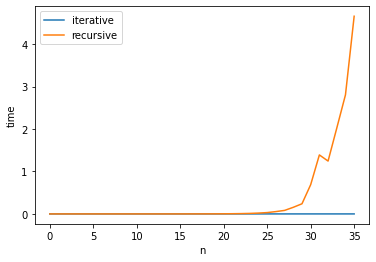

In [5]:
import time

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

values = range(36)
iterative_times = []
recursive_times = []
for value in values:
    b = time.time()
    val = iterative_fibonacci(value)
    e = time.time()
    iterative_times += [e - b] 

    b = time.time()
    val = recursive_fibonacci(value)
    e = time.time()
    recursive_times += [e - b] 

comparison_df = pd.DataFrame({"iterative": iterative_times, "recursive": recursive_times})

comparison_df.plot()
plt.xlabel("n")
plt.ylabel("time")
plt.show()

We see how the recursive approach does not scale well as the input gets bigger.

### 6. Implement a solution to the Tower of Hanoi using three stacks to keep track of the disks.

We just need to implement the poles using the `Stack` data structure. We initiate the first peg at the first iteration.

In [6]:
from pythonds3 import Stack

def move_tower(height, from_pole, to_pole, with_pole):
    if from_pole.is_empty() and to_pole.is_empty() and with_pole.is_empty():
        for i in range(1, height + 1):
            from_pole.push(f"disk{i}")
    if height >= 1:
        move_tower(height - 1, from_pole, with_pole, to_pole)
        move_disk(from_pole, to_pole)
        to_pole.push(from_pole.pop())
        move_tower(height - 1, with_pole, to_pole, from_pole)

def move_disk(from_p, to_p):
    print("moving disk from", from_p.name, "to", to_p.name)


A = Stack()
B = Stack()
C = Stack()

A.name = "A"
B.name = "B"
C.name = "C"

move_tower(3, A, B, C)

moving disk from A to B
moving disk from A to C
moving disk from B to C
moving disk from A to B
moving disk from C to A
moving disk from C to B
moving disk from A to B


We added a property to the `Stack` objects to differentiate the names and so to better illustrate the passages in the `move_disk()`.

### 7. Using the turtle graphics module, write a recursive program to display a Hilbert curve.

Solution is in the file `hilbert.py` ([here](./hilbert.py)). However, the code needs some explanation, since it might not be intuitive at all.

```
def hilbert(t, order, direction, step):
    print(f"Calling hilbert with order {order}, direction {direction}, step {step}.")
    if order > 0:
        t.left(direction * 90)
        hilbert(t, order - 1, - direction, step)
        t.forward(step)
        t.right(direction * 90)
        hilbert(t, order - 1, direction, step)
        t.forward(step)
        hilbert(t, order - 1, direction, step)
        t.right(direction * 90)
        t.forward(step)
        hilbert(t, order - 1, - direction, step)
        t.left(direction * 90)
```

If we want to draw a first order Hilbert's curve (`hilbert(t, order=1, direction=1, step)`), we see that all the recursive subcalls won't do anything, as the drawing will be done only if the if order is greater than zero, therefore calling the function with order set to zero won't do anything. In this case, we are going to draw a first order Hilbert's curve by turning left by 90 degree, stepping forward, turning right by 90 degree, stepping forward, turning right again by 90 degree, stepping forward and turning left. This will draw the reversed _U_ shape of the first order Hilbert's curve.

Now, let's assume `hilbert(t, order=2, direction=1, step)`. In order to write a continuous Hilbert's curve, we have to find a way to connect all the first order Hilbert's curves at the sides of the $2^{order} \times 2^{order} = 2^{2} \times 2^{2} = 4 \times 4$ plane. If we simply draw 4 Hilbert's curves in the same way we do for first order curves, then to connect them we would make "jumps" that would make the final curve itself discontinuous.
Having acknowledged this fact, and the fact that `direction = 1` always in the first call (you could make it -1 too, but that would turn the final curve upside down, which is also valid - the most important thing is to set direction either to 1 or -1), let's go step by step:

1. Turn left by direction * 90 degrees (this is always true).
2. Call the function `hilbert(t, order - 1, - direction, step)`. We call the function with the order reduced by one and the direction turned. In this subcall, we notice that the turtle will turn left by -90 degree, which basically means to turn right by 90 degrees. Since `order = 1`, we follow all the steps to make a first order curve.
3. Step forward.
4. Turn right by `direction * 90` degrees (we are back again the main call).
5. Call `hilbert(t, order - 1, direction, step)`. Direction is not inverted since we need to draw this curves starting (in our case) from the left to the right.
6. Step forward.
7. Call `hilbert(t, order - 1, direction, step)`. Direction is not inverted again for the same reason as point (5).
9. Turn right by `direction * 90`.
10. Step forward.
11. Call `hilbert(t, order - 1, - direction, step)`. Here we need to draw it inversely.
12. Turn left by `direction * 90`.

With higher orders, the procedure is similiar. See that turning left (or right, depending on the value of the angle) at the end will make us directly step forward at the end of each recursive call.

This is not the only possible way to achieve this, but it's a way suggested by many tutorials online too.

### 8. Using the turtle graphics module, write a recursive program to display a Koch snowflake.

Solution is at `koch.py` file ([here](./koch.py)). The code does need some points clarified.

* The way we go about solving the problem is by drawing three koch curves, each at 120 degrees to the left from the previous one.
* A zero order curve is a straight line.
* The recursive step here is to start with the smallest curve at the beginning of the routine, increase till the central main peak, from which we repeat the same process in both sides (of making the differently sized peaks) by changing the angle, and then repeat till the other end. 
* Repeat three times (fixed), turning left by 120 degrees each time.

### 9. Write a program to solve the following problem: You have two jugs: a 4-gallon jug and a 3-gallon jug. Neither of the jugs have markings on them. There is a pump that can be used to fill the jugs with water. How can you get exactly two gallons of water in the 4-gallon jug?

The trick is to use _memoization_ so that we can store the result of a previous recursive subcall and return it instead of re-entering the computation again: if we do the latter, we end up having some issues such as reaching the recursion call stack limit. The trick to solve the problem is to return True if the first jug has the desired amount (i.e. 2 in our case) or to call with all the valid combinations starting from the current combination (knowing we can't measure the quantities, we can empty them or fill them up, eventually leading us with intermediate quantities due to leftovers). When we reach the `True` condition (i.e. the first jug has two galloons of water), we also print the steps we made to reach that result.

In [7]:
def pour_jug(q1, q2, visited, steps):
    if q1 == 2:
        steps += [(q1, q2)]
        print(steps)
        return True
    elif (q1, q2) in visited:
        return visited[(q1, q2)]
    else:
        steps += [(q1, q2)]
        visited[(q1, q2)] = False
        avail1 = 4 - q1 
        avail2 = 3 - q2
        to1 = q2 if avail1 >= q2 else avail1
        to2 = q1 if avail2 >= q1 else avail2
        return pour_jug(4, 0, visited, steps) or \
               pour_jug(0, 3, visited, steps) or \
               pour_jug(0, 0, visited, steps) or \
               pour_jug(4, 3, visited, steps) or \
               pour_jug(q1 + to1, q2 - to1, visited, steps) or \
               pour_jug(q1 - to2, q2 + to2, visited, steps) or \
               pour_jug(q1, 0, visited, steps) or \
               pour_jug(0, q2, visited, steps) or \
               pour_jug(q1, 3, visited, steps) or \
               pour_jug(4, q2, visited, steps)

pour_jug(0, 0, {}, [])


[(0, 0), (4, 0), (0, 3), (4, 3), (3, 0), (3, 3), (4, 2), (0, 2), (2, 0)]


True

### 10. Generalize the problem above so that the parameters to your solution include the sizes of each jug and the final amount of water to be left in the larger jug.

It just takes a slight modification of the above function.

In [8]:
def pour_jug(q1, q2, c1, c2, target, visited, steps):
    if (c1 > c2 and q1 == target) or (c1 < c2 and q2 == target):
        steps += [(q1, q2)]
        print(steps)
        return True
    elif (q1, q2) in visited:
        return visited[(q1, q2)]
    else:
        steps += [(q1, q2)]
        visited[(q1, q2)] = False
        avail1 = c1 - q1 
        avail2 = c2 - q2
        to1 = q2 if avail1 >= q2 else avail1
        to2 = q1 if avail2 >= q1 else avail2
        return pour_jug(c1, 0, c1, c2, target, visited, steps) or \
               pour_jug(0, c2, c1, c2, target, visited, steps) or \
               pour_jug(0, 0, c1, c2, target, visited, steps) or \
               pour_jug(c1, c2, c1, c2, target, visited, steps) or \
               pour_jug(q1 + to1, q2 - to1, c1, c2, target, visited, steps) or \
               pour_jug(q1 - to2, q2 + to2, c1, c2, target, visited, steps) or \
               pour_jug(q1, 0, c1, c2, target, visited, steps) or \
               pour_jug(0, q2, c1, c2, target, visited, steps) or \
               pour_jug(q1, c2, c1, c2, target, visited, steps) or \
               pour_jug(c1, q2, c1, c2, target, visited, steps)

pour_jug(0, 0, 33, 1, 21, {}, [])


[(0, 0), (33, 0), (0, 1), (33, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0)]


True

As a side note, this solution is not very optimal since we are just going to blindly take all the possible allowed states of the two jugs, but it reaches the solution is a reasonable amount of time (remember to make progresses).

### 11. Write a program that solves the following problem: Three missionaries and three cannibals come to a river and find a boat that holds two people. Everyone must get across the river to continue on the journey. However, if the cannibals ever outnumber the missionaries on either bank, the missionaries will be eaten. Find a series of crossings that will get everyone safely to the other side of the river.

A crossing is done by travelling to the destination bank, and one has to travel back to the origin bank (to ride the boat back and eventually taking one more passenger). At each of these steps, no bank has to have a greater number of cannibals than that of missionaries, unless of course there are no people at that specific bank.

In [1]:
from itertools import product

def cross_river(from_m, from_c, to_m, to_c, b_m, b_c, visited, steps, states, debug=False):
    if from_m == 0 and from_c == 0:
        steps += [(b_m, b_c)]
        states += [(from_m, from_c, to_m, to_c, b_m, b_c)]
        if debug:
            for (step, state) in zip(steps, states):
                print(f"Step {step} brings to state {state}.")
        return True
    elif (from_m, from_c, to_m, to_c, b_m, b_c) in visited:
        return visited[(from_m, from_c, to_m, to_c, b_m, b_c)]
    elif (from_m < from_c and from_m > 0) or (to_m < to_c and to_m > 0):
        visited[(from_m, from_c, to_m, to_c, b_m, b_c)] = False
        return False
    else:
        visited[(from_m, from_c, to_m, to_c, b_m, b_c)] = False
        states += [(from_m, from_c, to_m, to_c, b_m, b_c)]
        steps += [(b_m, b_c)]
        possible_crossings = [
            (x, y) for (x, y) in list(product(range(from_m + b_m + 1), range(from_c + b_c + 1))) if x + y <= 2 and x + y > 0
        ]
        possible_states = []
        
        for (x, y) in possible_crossings:
            new_from_m = from_m + b_m - x
            new_from_c = from_c + b_c - y
            new_to_m = to_m + x
            new_to_c = to_c + y

            possible_crossings_back = [
                (x, y) for (x, y) in list(product(range(new_to_m + 1), range(new_to_c + 1))) if x + y <= 2 and x + y > 0
            ]

            for (x_b, y_b) in possible_crossings_back:
                possible_states += [(new_from_m, new_from_c, new_to_m - x_b, new_to_c - y_b, x_b, y_b, visited, steps, states)]
        
        return any(
            cross_river(*state) for state in possible_states
        )

cross_river(3, 3, 0, 0, 0, 0, {}, [], [])

True

#### Note

It's not the most efficient/correct solution (I am not including the backwards crossings). However, a better solution would be using different data structures (graphs/trees) instead of memoization.

### 12. Modify the Tower of Hanoi program using turtle graphics to animate the movement of the disks. Hint: You can make multiple turtles and have them shaped like rectangles.

Let's use the file `turtle_hanoi.py` to achieve this (file can be found [here](./turtle_hanoi.py)). __TODO__.

### 13. Pascal’s triangle is a number triangle with numbers arranged in staggered rows such that
$$
a_{nr} = \frac{n!}{r!(n - r)!}
$$

### This equation is the equation for a binomial coefficient. You can build Pascal’s triangle by adding the two numbers that are diagonally above a number in the triangle. An example of Pascal’s triangle is shown below.
```
        1
      1   1
    1   2   1
  1   3   3   1
1   4   6   4   1
```
### Write a program that prints out Pascal’s triangle. Your program should accept a parameter that tells how many rows of the triangle to print.